In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load cpi data
cpi_df = pd.read_excel('CPI data.xls', skiprows = 14)
cpi_df.index = cpi_df['observation_date']
cpi_df = cpi_df.drop('observation_date',axis = 1)
cpi_df

,CPIAUCSL,NORCPIALLMINMEI,SWECPIALLMINMEI,GBRCPIALLMINMEI,DEUCPIALLMINMEI
observation_date,,,,,
1947-01-01,21.480,NaN,NaN,NaN,NaN
1947-02-01,21.620,NaN,NaN,NaN,NaN
1947-03-01,22.000,NaN,NaN,NaN,NaN
1947-04-01,22.000,NaN,NaN,NaN,NaN
1947-05-01,21.950,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-09-01,296.539,125.6,122.296185,122.3,121.120187
2022-10-01,297.987,126.0,122.561068,124.3,122.220370
2022-11-01,298.598,125.8,123.802508,124.8,121.620270


In [3]:
#load exchange rate data
fx_df = pd.read_excel('exchange-rate data.xls', skiprows = 14)
fx_df.index = fx_df['observation_date']
fx_df = fx_df.drop('observation_date',axis = 1)
fx_df['USD_EUR'] = 1.95583/fx_df['EXGEUS'] #convert DEM/USD to USD/EUR
fx_df['USD_EUR'] = fx_df['USD_EUR'].fillna(fx_df['DEXUSEU']) # fill NaN with DEXUSEU

<AxesSubplot:xlabel='observation_date'>

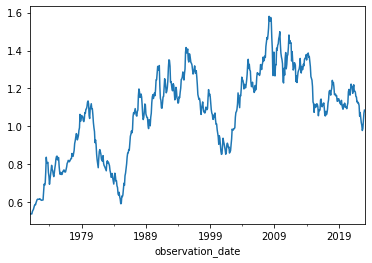

In [4]:
fx_df['USD_EUR'].plot()

In [5]:
#load S&P500 data
sp500_df = pd.read_excel('S&P 500 Total return 1970.xlsx', sheet_name = 'Monthly').dropna()
sp500_df.columns = ['Date', 'date_real', 'S&P500']
sp500_df.index = sp500_df['Date']
sp500_df = sp500_df.drop(['Date','date_real'],axis = 1)

In [6]:
#join datasets
df = (sp500_df
      .join(fx_df)
      .join(cpi_df))
df

,S&P500,DEXNOUS,DEXSDUS,DEXUSUK,EXGEUS,DEXUSEU,USD_EUR,CPIAUCSL,NORCPIALLMINMEI,SWECPIALLMINMEI,GBRCPIALLMINMEI,DEUCPIALLMINMEI
Date,,,,,,,,,,,,
1971-01-01,99.82,7.1445,5.1675,2.4174,3.6370,NaN,0.537759,39.900,13.402550,14.010344,8.820129,30.466088
1971-02-01,100.98,7.1420,5.1652,2.4160,3.6313,NaN,0.538603,39.900,13.402550,14.025433,8.868130,30.727039
1971-03-01,104.96,7.1314,5.1624,2.4168,3.6313,NaN,0.538603,40.000,13.474221,14.060641,8.940131,30.857515
1971-04-01,109.04,7.1312,5.1614,2.4193,3.6343,NaN,0.538159,40.100,13.474221,14.032140,9.132133,31.053229
1971-05-01,104.78,7.1115,5.1648,2.4178,3.5535,NaN,0.550395,40.300,13.545892,13.984637,9.192134,31.118467
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,16451.00,10.8719,11.1250,1.1134,NaN,0.9783,0.978300,296.539,125.600000,122.296185,122.300000,121.120187
2022-10-01,17782.90,10.3954,11.0462,1.1515,NaN,0.9885,0.988500,297.987,126.000000,122.561068,124.300000,122.220370
2022-11-01,18776.68,9.9400,10.6181,1.1962,NaN,1.0323,1.032300,298.598,125.800000,123.802508,124.800000,121.620270


In [7]:
#calculate S&P total return index in FX
df['S&P_NOK'] = df['S&P500']*df['DEXNOUS']
df['S&P_SEK'] = df['S&P500']*df['DEXSDUS']
df['S&P_GBP'] = df['S&P500']/df['DEXUSUK']
df['S&P_EUR'] = df['S&P500']/df['USD_EUR']

#calculate real S&P total return index
df['Real_S&P_USD'] = df['S&P500']/df['CPIAUCSL']
df['Real_S&P_NOK'] = df['S&P_NOK']/df['NORCPIALLMINMEI']
df['Real_S&P_SEK'] = df['S&P_SEK']/df['SWECPIALLMINMEI']
df['Real_S&P_GBP'] = df['S&P_GBP']/df['GBRCPIALLMINMEI']
df['Real_S&P_EUR'] =df['S&P_EUR']/df['DEUCPIALLMINMEI']

<AxesSubplot:xlabel='Date'>

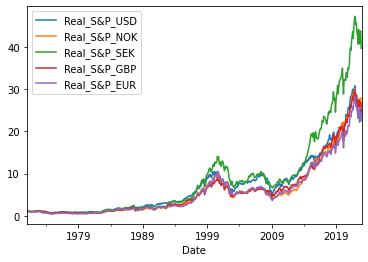

In [8]:
(df.filter(like = 'Real_S&P')/df.filter(like = 'Real_S&P').iloc[0]).plot()

In [9]:
#calculate real log-returns for S&P500 total return index in FX
log_return_df = np.log(df.filter(like = 'Real_S&P'))-np.log(df.filter(like = 'Real_S&P')).shift()
log_return_df =log_return_df.iloc[1:-1]
log_return_df

,Real_S&P_USD,Real_S&P_NOK,Real_S&P_SEK,Real_S&P_GBP,Real_S&P_EUR
Date,,,,,
1971-02-01,0.011554,0.011204,0.010032,0.006706,0.001457
1971-03-01,0.036154,0.031838,0.035607,0.030239,0.034420
1971-04-01,0.035639,0.038107,0.039971,0.015852,0.032639
1971-05-01,-0.044827,-0.047923,-0.035802,-0.045780,-0.064434
1971-06-01,-0.001616,-0.002885,-0.000741,-0.004564,-0.012568
...,...,...,...,...,...
2022-08-01,-0.043983,-0.015689,-0.016674,-0.001582,-0.031490
2022-09-01,-0.100739,-0.016913,-0.065137,-0.055671,-0.087377
2022-10-01,0.072980,0.029853,0.068579,0.027983,0.058436


In [10]:
#bootstrap
n = 10000 #number of samples drawn
res = {} #samle alle resultattabeller
for start_date in ['1971','1993']:
    log_return = log_return_df[start_date:] #get subsample
    
    tables = {col: pd.DataFrame(index = np.arange(1,11)) for col in log_return} #create one table for each currency
    for n_years in range(1,11):
        bootstrap_samples = pd.DataFrame(index = np.arange(n), columns = log_return.columns) #create dataframe to store samples

        start_index = np.random.randint(0,len(log_return)-12*n_years,n) #random start indices
        for i in range(n):
            bootstrap_samples.iloc[i] = log_return.iloc[start_index[i]:start_index[i]+12*(n_years)].sum() #store n_year log-return from random start date
        for col in tables:
            tables[col].loc[n_years, 'Mean (%)'] = bootstrap_samples[col].mean()*100
            tables[col].loc[n_years, 'Variance (%)'] = bootstrap_samples[col].var()*100
            tables[col].loc[n_years, 'Variance ratio'] = (tables[col].loc[n_years,'Variance (%)']/n_years)/tables[col].loc[1,'Variance (%)']
            tables[col].loc[n_years, 'Standard deviation (%)'] = bootstrap_samples[col].std()*100
            tables[col].loc[n_years, 'Coefficient of variation'] = (tables[col].loc[n_years,'Standard deviation (%)'])/tables[col].loc[n_years,'Mean (%)']
    res[start_date] = tables

In [11]:
res['1971']['Real_S&P_USD']

,Mean (%),Variance (%),Variance ratio,Standard deviation (%),Coefficient of variation
1,5.902975,2.760383,1.000000,16.614401,2.814581
2,12.905953,5.421361,0.981994,23.283815,1.804114
3,18.961179,8.065486,0.973957,28.399800,1.497787
4,26.296236,10.740797,0.972763,32.773155,1.246306
5,33.692397,13.241742,0.959413,36.389205,1.080042
6,41.235801,14.671552,0.885840,38.303462,0.928889
7,48.480196,16.207950,0.838804,40.259098,0.830424
8,55.969342,18.968211,0.858948,43.552509,0.778149
9,63.100436,22.043033,0.887278,46.950009,0.744052
10,71.201501,23.007393,0.833485,47.966022,0.673666


In [13]:
# Create a Pandas Excel writer
writer = pd.ExcelWriter('mukherji_tabeller v2.xlsx')

# Write each dataframe to a different worksheet.
for start_date in res:
    for col in res[start_date]:
        res[start_date][col].to_excel(writer, sheet_name=f'{start_date}-2022 {col[-3:]}')
# Close the Pandas Excel writer and output the Excel file.
writer.close()